In [43]:
import csv
import cv2
import h5py
import numpy as np
from random import shuffle
from util import *
import matplotlib.pyplot as plt
# from keras.models import Sequential 
# from keras.layers import Flatten, Dense, Lambda, Dropout
# from keras.layers.convolutional import Convolution2D
# from keras.layers.pooling import MaxPooling2D
# from keras.optimizers import Adam
%matplotlib inline

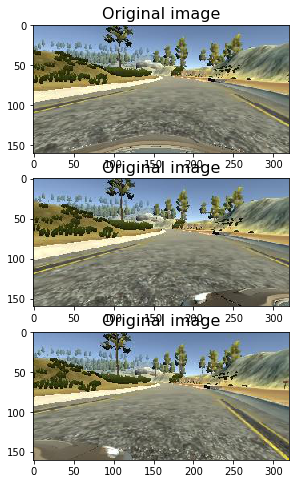

In [36]:
# load data
name = '../../track1/driving_log.csv'
lines = []

with open(name) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
# keep samples only
lines = lines[1:]

# load and crop the first image from center camera
# source_path = lines[0][0]
measurement = float(lines[0][3])
# filename = source_path.split('/'[-1])
current_path = lines[15][0]
# the original center image
raw_image = cv2.imread(current_path)

# plot the original image vs images with different transformation
fig = plt.figure(figsize = (10,8));
# original image
plt.subplot(3,1,1)
plt.imshow(cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB));
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/raw_center.png',cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB))
# left
plt.subplot(3,1,2)
plt.imshow(cv2.cvtColor(cv2.imread(lines[15][1]), cv2.COLOR_BGR2RGB));
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/raw_left.png',cv2.cvtColor(cv2.imread(lines[15][1]), cv2.COLOR_BGR2RGB))
# right
plt.subplot(3,1,3)
plt.imshow(cv2.cvtColor(cv2.imread(lines[15][2]), cv2.COLOR_BGR2RGB));
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/raw_right.png',cv2.cvtColor(cv2.imread(lines[15][2]), cv2.COLOR_BGR2RGB))

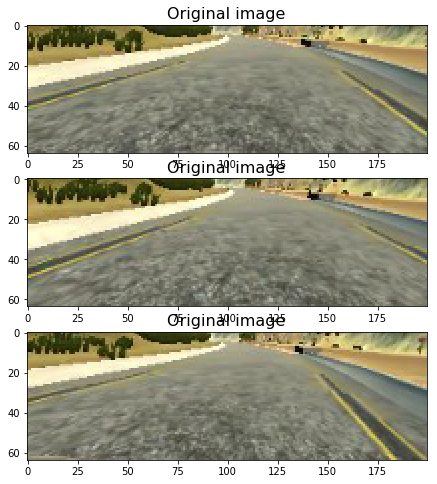

In [37]:
# the original center image
raw_image = procImg(cv2.imread(current_path))

# plot the original image vs images with different transformation
fig = plt.figure(figsize = (10,8));
# original image
plt.subplot(3,1,1)
plt.imshow(cv2.cvtColor(raw_image, cv2.COLOR_HSV2RGB));
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/cropped_center.png',cv2.cvtColor(raw_image, cv2.COLOR_HSV2RGB))
# left
plt.subplot(3,1,2)
plt.imshow(cv2.cvtColor(procImg(cv2.imread(lines[15][1])), cv2.COLOR_HSV2RGB));
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/cropped_left.png',cv2.cvtColor(procImg(cv2.imread(lines[15][1])), cv2.COLOR_HSV2RGB))
# right
plt.subplot(3,1,3)
plt.imshow(cv2.cvtColor(procImg(cv2.imread(lines[15][2])), cv2.COLOR_HSV2RGB));
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/cropped_right.png',cv2.cvtColor(procImg(cv2.imread(lines[15][2])), cv2.COLOR_HSV2RGB))

1
-1


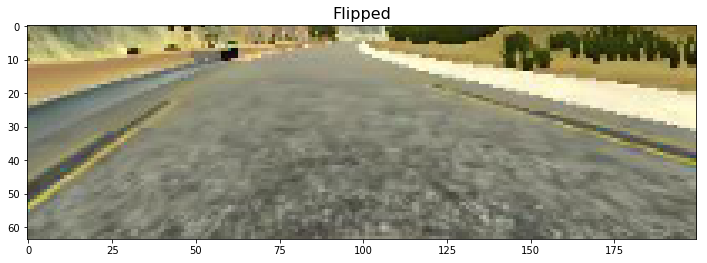

In [23]:
flipped_image, flipped_measurement = flipImgRnd(raw_image, 1,0.5)
# plot the original image vs images with different transformation
fig = plt.figure(figsize = (12,8));
plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_HSV2RGB));
plt.title('Flipped', fontsize = 16);
plt.imsave('./img_writeup/flipped_center.png',cv2.cvtColor(flipped_image, cv2.COLOR_HSV2RGB))
print(1)
print(flipped_measurement)

1
0.1


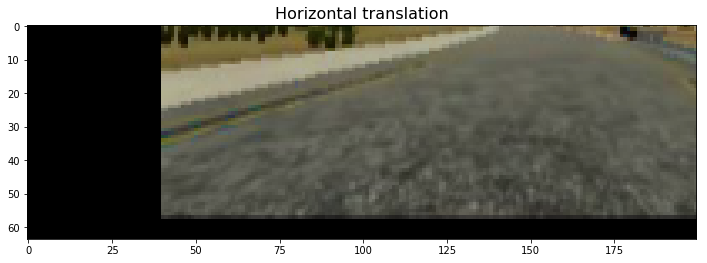

In [28]:
tranX_image, translated_measurement = tranX(raw_image, 0, ftxy = [0.2, -0.1] , f_steering = 0.5)
fig = plt.figure(figsize = (12,8));
plt.imshow(cv2.cvtColor(tranX_image, cv2.COLOR_HSV2RGB));
plt.title('Horizontal translation', fontsize = 16);
print(1)
print(translated_measurement)
plt.imsave('./img_writeup/translated_center.png',cv2.cvtColor(tranX_image, cv2.COLOR_HSV2RGB))

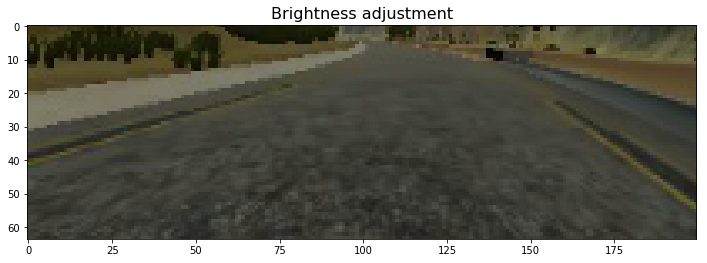

In [38]:
b_image = brightness(raw_image, fv = 0.5)
fig = plt.figure(figsize = (12,8));
plt.imshow(cv2.cvtColor(b_image, cv2.COLOR_HSV2RGB));
plt.title('Brightness adjustment', fontsize = 16);
plt.imsave('./img_writeup/dim_center.png',cv2.cvtColor(b_image, cv2.COLOR_HSV2RGB))

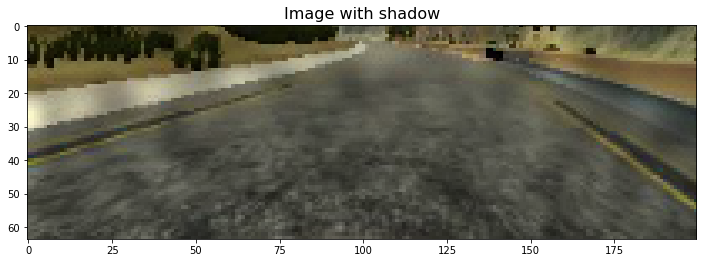

In [42]:
g_image = gausNoise(raw_image)
fig = plt.figure(figsize = (12,8));
plt.imshow(cv2.cvtColor(g_image, cv2.COLOR_HSV2RGB));
plt.title('Image with shadow', fontsize = 16);
plt.imsave('./img_writeup/gNoise_center.png',cv2.cvtColor(g_image, cv2.COLOR_HSV2RGB))

0
-0.0226489920169


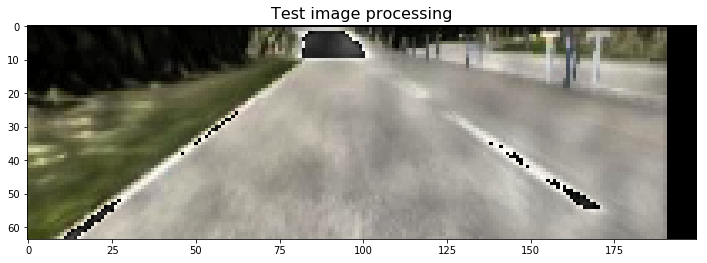

In [9]:
p_image, processed_measurement = augmImg(raw_image,0)
fig = plt.figure(figsize = (12,8));
plt.imshow(cv2.cvtColor(p_image, cv2.COLOR_HSV2RGB));
plt.title('Test image processing', fontsize = 16);
print(0)
print(processed_measurement)

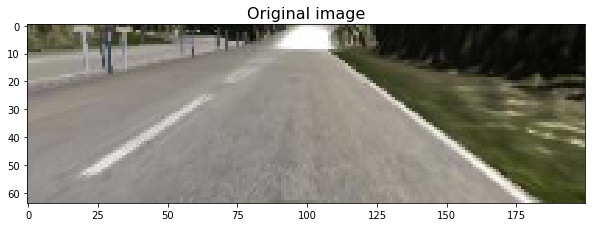

In [8]:
from PIL import Image
# from io import BytesIO
# import base64
image = Image.open(open(current_path,'rb'))
# turn the image to a numpy array
image_array = np.asarray(image)
# resize the image
image_array = cv2.resize(cv2.cvtColor(image_array,cv2.COLOR_RGB2YUV),(200,128))
# crop the image to our model's input
image_array = image_array[46:110,:,:]

# plot the original image vs images with different transformation
fig = plt.figure(figsize = (10,8));
# original image
plt.subplot(1,1,1)
plt.imshow(cv2.cvtColor(image_array,cv2.COLOR_YUV2RGB));
plt.title('Original image', fontsize = 16);


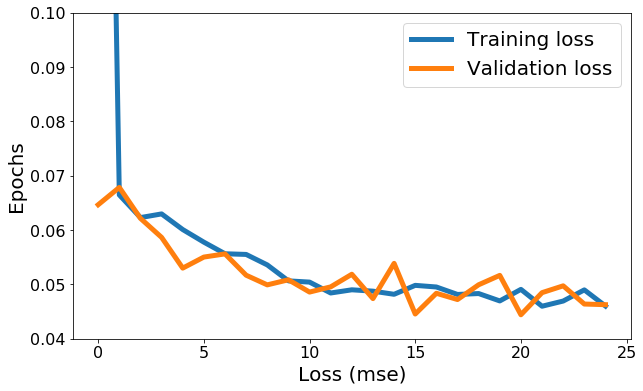

In [47]:
import pickle
with open(r"model_history", "rb") as input_file:
    history = pickle.load(input_file)

plt.figure(figsize=(10,6));
ax = plt.subplot(111)
plt.plot(history['loss'], linewidth = 5, label = 'Training loss');
plt.plot(history['val_loss'], linewidth = 5, label = 'Validation loss');
plt.xlabel('Loss (mse)',fontsize = 20);
plt.xticks(fontsize = 16);
plt.ylabel('Epochs',fontsize = 20);
plt.yticks(fontsize = 16);
plt.ylim([0.04, 0.1])
ax.legend(fontsize = 20);
plt.savefig('./img_writeup/model_history.png')

In [49]:
from keras.models import load_model

In [50]:
model = load_model('model.h5')

In [51]:

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one